In [1]:
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
mTurk_res = np.load('mTurk-res.npy')
mTurk_res.shape
mTurk_res = mTurk_res[:,[0,2,1]] #ORIG SEG BG

In [4]:
df = pd.read_csv('mTurk_masterfile_2.csv')

In [5]:
def get_human_acc(mat,return_mat=False):
    human_mat = np.array([mat[test_lbls==df['cat_idx'].values[i],:].mean(axis=0)[df[['choice_idx_1','choice_idx_2','choice_idx_3','choice_idx_4','choice_idx_5']].values[i,:]] for i in range(80)])
    huamn_acc = (human_mat.argmax(axis=1)==0).mean().round(4)
    return huamn_acc

def get_acc_top1(mat):
    acc = (mat.argmax(axis=1)==test_lbls).mean()
    #acc = acc*100
    acc = acc.round(4)
    return acc
    
def get_acc_top5(mat):
    acc = np.array([test_lbls[i] in mat[i,:].argsort()[-1::-1][0:5] for i in range(len(test_lbls))]).mean()
    #acc = acc*100
    acc = acc.round(4)
    return acc

In [6]:
data_DomainNet = np.load('./Data_DomainNet.npz')
test_lbls = data_DomainNet['test_lbls']
[f'{lbl} {data_DomainNet[lbl].shape}' if len(data_DomainNet[lbl].shape)>0 else f'{lbl} {data_DomainNet[lbl]:.4f}' for lbl in list(data_DomainNet.keys()) ]

['test_lbls (7697,)',
 'bg_outputs (7697, 121)',
 'seg_outputs (7697, 121)',
 'comb_outputs (7697, 121)',
 'bg_acc 0.0442',
 'seg_acc 0.1415',
 'comb_acc 0.1616',
 'bg_acc_top5 0.2227',
 'seg_acc_top5 0.3917',
 'comb_acc_top5 0.3778']

In [7]:
data_StaticNet = np.load('./Data_StaticNet.npz')
[f'{lbl} {data_StaticNet[lbl].shape}' if len(data_StaticNet[lbl].shape)>0 else f'{lbl} {data_StaticNet[lbl]:.4f}' for lbl in list(data_StaticNet.keys()) ]

['test_lbls (7697,)',
 'outputs_orig (7697, 121)',
 'outputs_bg (7697, 121)',
 'outputs_seg (7697, 121)',
 'acc_top1_orig 0.0521',
 'acc_top1_bg 0.0265',
 'acc_top1_seg 0.0097',
 'orig_acc_top5 0.2128',
 'bg_acc_top5 0.1262',
 'seg_acc_top5 0.0642']

In [8]:
# columns = ['network','top1_ORIG','top1_SEG','top1_BG','top5_ORIG','top5_SEG','top5_BG','hlike_ORIG','hlike_SEG','hlike_BG']
# res_df = pd.DataFrame(columns=columns)
# res_df

In [9]:
print([get_acc_top1(data_StaticNet['outputs_orig']),
      get_acc_top1(data_StaticNet['outputs_seg']),
      get_acc_top1(data_StaticNet['outputs_bg']),])

print([get_acc_top5(data_StaticNet['outputs_orig']),
      get_acc_top5(data_StaticNet['outputs_seg']),
      get_acc_top5(data_StaticNet['outputs_bg']),])

print([get_human_acc(data_StaticNet['outputs_orig']),
      get_human_acc(data_StaticNet['outputs_seg']),
      get_human_acc(data_StaticNet['outputs_bg']),])

[0.0521, 0.0097, 0.0265]
[0.2128, 0.0642, 0.1262]
[0.525, 0.2, 0.4]


In [10]:
print([get_acc_top1(data_DomainNet['comb_outputs']),
      get_acc_top1(data_DomainNet['seg_outputs']),
      get_acc_top1(data_DomainNet['bg_outputs']),])

print([get_acc_top5(data_DomainNet['comb_outputs']),
      get_acc_top5(data_DomainNet['seg_outputs']),
      get_acc_top5(data_DomainNet['bg_outputs']),])

print([get_human_acc(data_DomainNet['comb_outputs']),
      get_human_acc(data_DomainNet['seg_outputs']),
      get_human_acc(data_DomainNet['bg_outputs']),])

[0.1616, 0.1415, 0.0442]
[0.3778, 0.3917, 0.2227]
[0.6625, 0.625, 0.425]


[0.525, 0.2, 0.4]


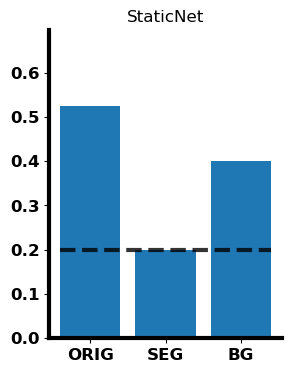

In [11]:
fig,ax = plt.subplots(1,1,figsize=(3,4))

xs = [0,1,2,]
ys = [get_human_acc(data_StaticNet['outputs_orig']),
      get_human_acc(data_StaticNet['outputs_seg']),
      get_human_acc(data_StaticNet['outputs_bg']),]

print(ys)

lbls = ['ORIG','SEG','BG']
plt.bar(xs,ys)
plt.plot([-.4,2.4],[1/5,1/5],'k--',linewidth=3,alpha=.8)
plt.xticks(xs,labels=lbls,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title('StaticNet')
plt.ylim(0,0.6956249999999999)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

[0.6625, 0.625, 0.425]


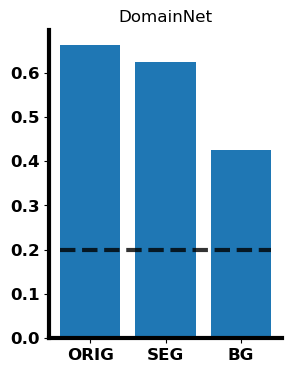

In [12]:
fig,ax = plt.subplots(1,1,figsize=(3,4))
xs = [0,1,2,]
ys = [get_human_acc(data_DomainNet['comb_outputs']),
      get_human_acc(data_DomainNet['seg_outputs']),
      get_human_acc(data_DomainNet['bg_outputs'])]
print(ys)
lbls = ['ORIG','SEG','BG']
plt.bar(xs,ys)
plt.plot([-.4,2.4],[1/5,1/5],'k--',linewidth=3,alpha=.8)
plt.xticks(xs,labels=lbls,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title('DomainNet')
plt.ylim(0,0.6956249999999999)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

In [13]:
mTurk_res.mean(axis=0).round(4)

array([0.9843, 0.9393, 0.7629])

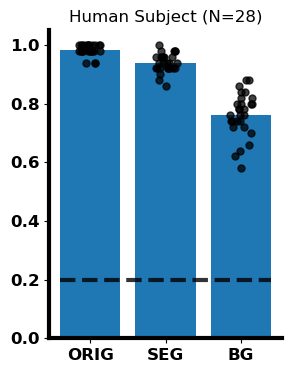

In [14]:
fig,ax = plt.subplots(1,1,figsize=(3,4))

xs = [0,1,2,]
ys = mTurk_res.mean(axis=0)

lbls = ['ORIG','SEG','BG']
plt.bar(xs,ys)
plt.plot([-.4,2.4],[1/5,1/5],'k--',linewidth=3,alpha=.8)
plt.xticks(xs,labels=lbls)
plt.title('Human (Mturk N=28)')


radfact = .3
resmat = mTurk_res
markersize = 10
plt.plot(np.ones(resmat.shape[0])*0 + (np.random.rand(resmat.shape[0])-.5)*radfact,resmat[:,0],'k.',markersize=markersize,alpha=.75)
plt.plot(np.ones(resmat.shape[0])*1 + (np.random.rand(resmat.shape[0])-.5)*radfact,resmat[:,1],'k.',markersize=markersize,alpha=.75)
plt.plot(np.ones(resmat.shape[0])*2 + (np.random.rand(resmat.shape[0])-.5)*radfact,resmat[:,2],'k.',markersize=markersize,alpha=.75)


plt.xticks(xs,labels=lbls,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
plt.title('Human Subject (N=28)')
#plt.ylim(0,0.6956249999999999)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

In [15]:
print([get_acc_top1(data_StaticNet['outputs_orig']),get_acc_top1(data_StaticNet['outputs_seg']),get_acc_top1(data_StaticNet['outputs_bg']),])
print([get_acc_top5(data_StaticNet['outputs_orig']),get_acc_top5(data_StaticNet['outputs_seg']),get_acc_top5(data_StaticNet['outputs_bg']),])

[0.0521, 0.0097, 0.0265]
[0.2128, 0.0642, 0.1262]


In [16]:
print([get_acc_top1(data_DomainNet['comb_outputs']),get_acc_top1(data_DomainNet['seg_outputs']),get_acc_top1(data_DomainNet['bg_outputs'])])
print([get_acc_top5(data_DomainNet['comb_outputs']),get_acc_top5(data_DomainNet['seg_outputs']),get_acc_top5(data_DomainNet['bg_outputs'])])

[0.1616, 0.1415, 0.0442]
[0.3778, 0.3917, 0.2227]


In [17]:
indir = '../Data/pytorch-data/weights/domain_net_working-1-testagain/'
files = [file for file in os.listdir(indir) if file.endswith('.npy')]
files.sort()
files_domainNet = {}
for file in files:
    files_domainNet.update({file.replace('.npy','') : np.load(os.path.join(indir,file))})
print(list(files_domainNet.keys()))

['acc_train_bg', 'acc_train_comb', 'acc_train_seg', 'acc_val_bg', 'acc_val_comb', 'acc_val_seg', 'loss_train_bg', 'loss_train_comb', 'loss_train_seg', 'loss_val_bg', 'loss_val_comb', 'loss_val_seg']


Text(0.5, 0.98, 'DomainNet')

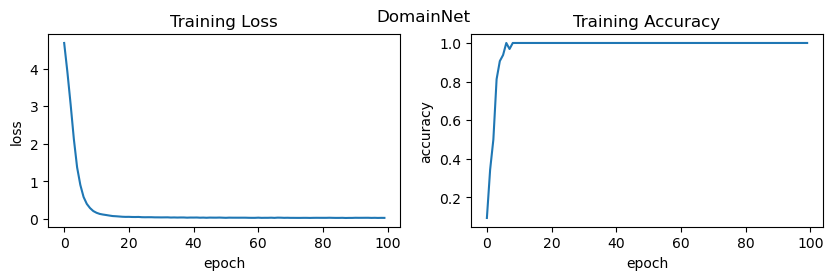

In [18]:
plt.figure(figsize=(10,2.5))
plt.subplot(1,2,1);plt.plot(files_domainNet['loss_train_comb']);plt.title('Training Loss');plt.ylabel('loss');plt.xlabel('epoch')
plt.subplot(1,2,2);plt.plot(files_domainNet['acc_train_comb']);plt.title('Training Accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.suptitle('DomainNet')

In [19]:
indir = '../Data/pytorch-data/weights/Staticnet-1'
files = [file for file in os.listdir(indir) if file.endswith('.npy')]
files.sort()
files_StaticNet = {}
for file in files:
    files_StaticNet.update({file.replace('.npy','') : np.load(os.path.join(indir,file))})
print(list(files_StaticNet.keys()))

['acc_train_orig', 'acc_val_orig', 'loss_train_orig', 'loss_val_orig']


Text(0.5, 0.98, 'StaticNet')

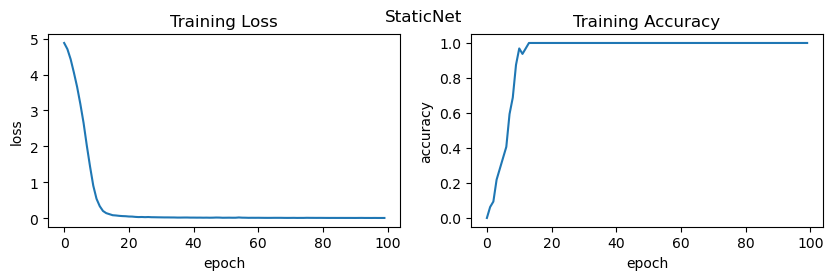

In [20]:
plt.figure(figsize=(10,2.5))
plt.subplot(1,2,1);plt.plot(files_StaticNet['loss_train_orig']);plt.title('Training Loss');plt.ylabel('loss');plt.xlabel('epoch')
plt.subplot(1,2,2);plt.plot(files_StaticNet['acc_train_orig']);plt.title('Training Accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.suptitle('StaticNet')

Text(0.5, 0, 'epoch')

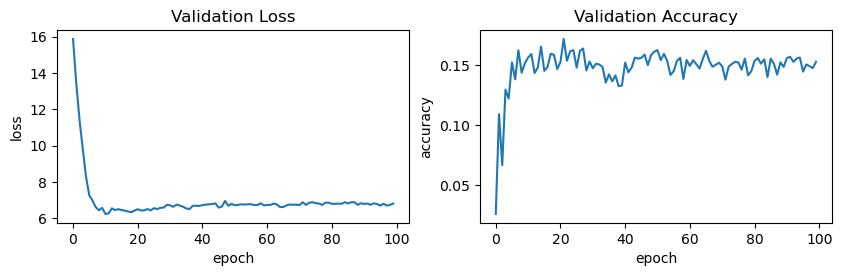

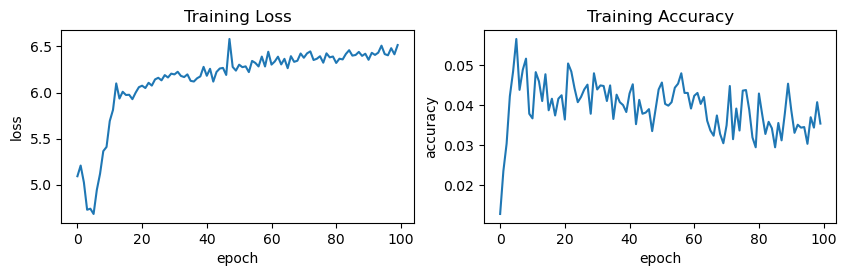

In [21]:
plt.figure(figsize=(10,2.5))
plt.subplot(1,2,1);plt.plot(files_domainNet['loss_val_comb']);plt.title('Validation Loss');plt.ylabel('loss');plt.xlabel('epoch')
plt.subplot(1,2,2);plt.plot(files_domainNet['acc_val_comb']);plt.title('Validation Accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')

plt.figure(figsize=(10,2.5))
plt.subplot(1,2,1);plt.plot(files_StaticNet['loss_val_orig']);plt.title('Training Loss');plt.ylabel('loss');plt.xlabel('epoch')
plt.subplot(1,2,2);plt.plot(files_StaticNet['acc_val_orig']);plt.title('Training Accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')

In [22]:
test_lbls = np.load('DomainFlow-baseline-ORIG.npz')['all_lbls_frames']

In [23]:
Data_DomainFlow4 = np.load('Data_DomainFlow-4stream.npz')
list(Data_DomainFlow4.keys())

['all_outputs_frames_bg',
 'all_outputs_frames_seg',
 'all_outputs_flows_bg',
 'all_outputs_flows_seg',
 'all_outputs_combined',
 'all_lbls_frames',
 'all_lbls_flows']

In [24]:
print([get_acc_top1(Data_DomainFlow4['all_outputs_combined']),
 get_acc_top1((Data_DomainFlow4['all_outputs_frames_seg']+Data_DomainFlow4['all_outputs_flows_seg'])),
get_acc_top1((Data_DomainFlow4['all_outputs_frames_bg']+Data_DomainFlow4['all_outputs_flows_bg'])),])

print([get_acc_top5(Data_DomainFlow4['all_outputs_combined']),
 get_acc_top5((Data_DomainFlow4['all_outputs_frames_seg']+Data_DomainFlow4['all_outputs_flows_seg'])),
 get_acc_top5((Data_DomainFlow4['all_outputs_frames_bg']+Data_DomainFlow4['all_outputs_flows_bg']))])

print([get_human_acc(Data_DomainFlow4['all_outputs_combined']),
 get_human_acc((Data_DomainFlow4['all_outputs_frames_seg']+Data_DomainFlow4['all_outputs_flows_seg'])),
get_human_acc((Data_DomainFlow4['all_outputs_frames_bg']+Data_DomainFlow4['all_outputs_flows_bg']))])

[0.249, 0.2585, 0.0583]
[0.5289, 0.5539, 0.1908]
[0.75, 0.7375, 0.3875]


In [25]:
print(get_human_acc((Data_DomainFlow4['all_outputs_flows_seg'])))
print(get_human_acc((Data_DomainFlow4['all_outputs_frames_seg'])))
print(get_human_acc((Data_DomainFlow4['all_outputs_frames_seg']+Data_DomainFlow4['all_outputs_flows_seg'])))

0.7375
0.575
0.7375


In [26]:
print(get_human_acc((Data_DomainFlow4['all_outputs_flows_bg'])))
print(get_human_acc((Data_DomainFlow4['all_outputs_frames_bg'])))
print(get_human_acc((Data_DomainFlow4['all_outputs_frames_bg']+Data_DomainFlow4['all_outputs_flows_bg'])))

0.3
0.425
0.3875


In [27]:
DomainFlow_baseline_orig_comb =np.load('DomainFlow-baseline-ORIG.npz')['all_outputs_combined']
DomainFlow_baseline_seg_comb =np.load('DomainFlow-baseline-SEG.npz')['all_outputs_combined']
DomainFlow_baseline_bg_comb = np.load('DomainFlow-baseline-BG.npz')['all_outputs_combined']

DomainFlow_baseline_orig_frames =np.load('DomainFlow-baseline-ORIG.npz')['all_outputs_frames']
DomainFlow_baseline_seg_frames =np.load('DomainFlow-baseline-SEG.npz')['all_outputs_frames']
DomainFlow_baseline_bg_frames = np.load('DomainFlow-baseline-BG.npz')['all_outputs_frames']

DomainFlow_baseline_orig_flows =np.load('DomainFlow-baseline-ORIG.npz')['all_outputs_flows']
DomainFlow_baseline_seg_flows =np.load('DomainFlow-baseline-SEG.npz')['all_outputs_flows']
DomainFlow_baseline_bg_flows = np.load('DomainFlow-baseline-BG.npz')['all_outputs_flows']

In [28]:
print(get_human_acc((DomainFlow_baseline_bg_flows)))
print(get_human_acc((DomainFlow_baseline_bg_frames)))
#print(get_human_acc((DomainFlow_baseline_bg_frames+DomainFlow_baseline_bg_flows)))
print(get_human_acc((DomainFlow_baseline_bg_comb)))

0.3375
0.45
0.475


In [29]:
print([get_acc_top1(DomainFlow_baseline_orig_comb),get_acc_top1(DomainFlow_baseline_seg_comb),get_acc_top1(DomainFlow_baseline_bg_comb)])
print([get_acc_top5(DomainFlow_baseline_orig_comb),get_acc_top5(DomainFlow_baseline_seg_comb),get_acc_top5(DomainFlow_baseline_bg_comb)])
print([get_human_acc(DomainFlow_baseline_orig_comb),get_human_acc(DomainFlow_baseline_seg_comb),get_human_acc(DomainFlow_baseline_bg_comb)])

[0.0776, 0.0225, 0.0566]
[0.2393, 0.0507, 0.1518]
[0.575, 0.225, 0.475]


In [30]:
print([get_acc_top1(DomainFlow_baseline_orig_frames),get_acc_top1(DomainFlow_baseline_seg_frames),get_acc_top1(DomainFlow_baseline_bg_frames)])
print([get_acc_top5(DomainFlow_baseline_orig_frames),get_acc_top5(DomainFlow_baseline_seg_frames),get_acc_top5(DomainFlow_baseline_bg_frames)])
print([get_human_acc(DomainFlow_baseline_orig_frames),get_human_acc(DomainFlow_baseline_seg_frames),get_human_acc(DomainFlow_baseline_bg_frames)])

[0.0517, 0.0148, 0.0453]
[0.1762, 0.0689, 0.1607]
[0.4625, 0.2125, 0.45]


In [31]:
print([get_acc_top1(DomainFlow_baseline_orig_flows),get_acc_top1(DomainFlow_baseline_seg_flows),get_acc_top1(DomainFlow_baseline_bg_flows)])
print([get_acc_top5(DomainFlow_baseline_orig_flows),get_acc_top5(DomainFlow_baseline_seg_flows),get_acc_top5(DomainFlow_baseline_bg_flows)])
print([get_human_acc(DomainFlow_baseline_orig_flows),get_human_acc(DomainFlow_baseline_seg_flows),get_human_acc(DomainFlow_baseline_bg_flows)])

[0.0536, 0.0238, 0.0358]
[0.1857, 0.05, 0.1154]
[0.5, 0.2125, 0.3375]
